<a href="https://colab.research.google.com/github/bhavinithak/DeepLearning_Pytorch/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastbook

In [3]:
from fastbook import *

In [4]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 51.1MB/s]


epoch,train_loss,valid_loss,time
0,3.267899,2.462379,01:15


epoch,train_loss,valid_loss,time
0,2.049052,1.892684,01:19
1,1.786236,1.465509,01:19
2,1.605291,1.352362,01:16
3,1.429646,1.129149,01:16
4,1.282498,1.066478,01:17
5,1.156884,0.940302,01:21
6,1.053181,0.924062,01:16
7,0.969820,0.902499,01:17


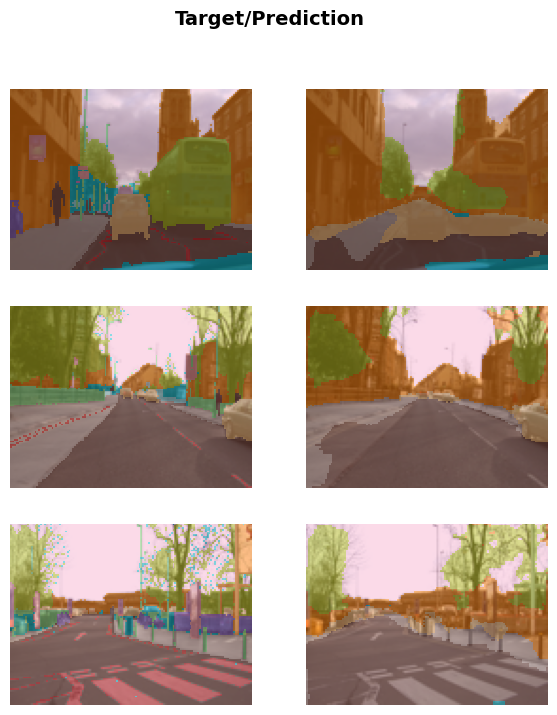

In [5]:
learn.show_results(max_n=3, figsize=(7,8))